<img src="https://pa-legg.github.io/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics 23-24

## Portfolio Assignment: Worksheet 2

## Conduct an investigation on a URL database to develop a DGA classification system using machine learning techniques
---

For this task, the company **"UWEtech"** enlist your help once more. They have identified a number of suspicious URLs on their logging systems, suspecting that these URLs contain various malware, and so require your expertise to investigate these further. Specifically, they seek a machine learning approach to identify the malware families as observed on their network.

You will need to develop a machine learning tool using Python and scikit-learn that can identify URLs based on [Domain Generator Algorithms (DGA)](https://blog.malwarebytes.com/security-world/2016/12/explained-domain-generating-algorithm/), widely used by command and control malware to avoid static IP blocking.

You need to demonstrate experimental design of appropriate feature engineering to characterise the data, that will be used to inform your machine learning classifiers. You should show **at least two** schemes of curating appropriate features, based on the raw data as provided, and show this impacts the performance of your classifier.

You are also expected to utilise **3 different classifiers** using the scikit-learn library, and show how the model parameters can impact the performance of the classifiers. It is suggested that you use a Logistic Regression, a Random Forest Classifier, and a Multi-Layer Perceptron Classifier.

Finally, you should investigate the **performance and explainability** of your classifiers. It is recommended that you use the confusion matrix approach along with performance metrics, to assess how your model performs as well as when and why misclassification may occur. In reporting your findings, you should explain and reflect on this to understand which malware families are more separable, and which are more challenging to classify, using this approach. It is expected that a good performing classifier will achieve over 90% accuracy - however you will be assessed on your experimental design in finding a suitable classifier to achieve this.

**Dataset**: Please see the folder ***"Portfolio Assignment"*** under the Assignment tab on Blackboard for further detail related to the access and download of the necessary dataset.

**Hint**: You should conduct research using the [scikit-learn documentation and API reference](https://scikit-learn.org/stable/user_guide.html), making full use of the sample code that has been provided for your to help guide your research. You should also research Shapley Additive Explanations, and utilise the [online documentation](https://shap.readthedocs.io/en/latest/index.html). You should also think about a suitable means of generating input features for your classifier that capture sequential properties of text data.

### Assessment and Marking
---
The completion of this worksheet is worth **35%** of your portfolio assignment for the UFCFFY-15-M Cyber Security Analytics (CSA) module.

This is an **unguided** task that will be graded against the following core criteria:

* **A clear and iterative experimental approach for developing and refining the classifier to improve performance (10 Marks)**
  * *For the higher mark band, it would be expected that you would show an initial experimental design, and then refine this through improving the feature engineering stage, subsequently improving the model performance.*
* **Suitable feature engineering stages demonstrating at least two different methods and their performance (10 Marks)**
  * *For the higher mark band, it would be expected that you would demonstrate two sensible approaches for curating features, with strong justification as to why they would characterise the data fairly.*
* **Suitable use of the sci-kit machine learning library (5 Marks)**
  * *For the higher mark band, it would be expected that you would show a good comprehension of the library usage.*
* **Clear evaluation of ML performance and explainability (5 Marks)**
  * *For the higher mark band, it would be expected that you would use confusion matrices to explain which malware classes are more separable, and which share similarity according to a well-trained model.*
* **Clarity and presentation (5 Marks)**
  * *For the higher mark band, it would be expected that your notebook is clear and concise, with good use of Markdown to annotate your work professionally.*

### Submission Documents
---

Your submission for this task should include:

- **1 Jupyter Notebook file (*.ipynb)**

You should complete your work using the ipynb file provided (i.e., this document). Once you have completed your work, you should ensure that all code cells have been executed and then you should save your notebook. **Please note: Staff will NOT execute your notebook during marking. It is your responsibility to ensure that your saved notebook shows the code cell outputs as required.**

The deadline for your portfolio submission is **THURSDAY 2ND MAY @ 14:00**. This assignment is eligible for the [48-hour late submission window](https://www.uwe.ac.uk/study/academic-information/personal-circumstances/late-submission-window), however module staff will not be able to assist with any queries after the deadline.

Your portfolio submitted to Blackboard must contain 3 independent documents:

- ***STUDENT_ID-TASK1.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK2.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK3.pdf*** (a PDF report of your research investigation)

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You should use the [online Q&A form](https://forms.office.com/e/yxFJZDraRG) to ask questions related to this module and this assignment, as well as utilising the on-site teaching sessions.

---

# Student ID: 23008852

- **By submitting this assignment to Blackboard as part of your portfolio, I declare that the submission is my own work.**

***

# Catalog
1 Get the data ready
- 1.1 Import data
- 1.2 Pre-processing the data
- 1.3 Use seaborn `countplot` to view the data visual easily
- 1.4 Useful function for calculating the length of URLs
- 1.5 Create train/test data
- 1.6 Convert string into float

2 Random Forest Classifier
- 2.1 Create train/test data for Random Forest Classifier

### Pre-install useful packages

In [216]:
!pip3 install colorama  tldextract whois pyopenssl  catboost tldextract tld

### Import useful libraries

In [217]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
import seaborn as sns
# Preparation for Logistic Regression

import os
import gc
import datetime
from numba import njit
from abc import abstractmethod, ABCMeta
from sklearn.kernel_approximation import Nystroem
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
# from cuml import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.inspection import DecisionBoundaryDisplay
from tqdm.notebook import tqdm
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Parsing Urls
import re
from urllib.parse import urlparse
import os.path
import string
import logging

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Default settings of CSA Assessment 2
from collections import Counter
from timeit import timeit
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, Perceptron
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from tldextract import extract as tld_extract
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError

from colorama import Fore
from datetime import datetime
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from wordcloud import WordCloud
from gensim.models import Word2Vec
import tldextract
import hashlib
import whois
import warnings
from urllib.parse import urlparse

# %matplotlib inline

# 1 Get the data ready

### 1.1 Import data
- Import data as `data`
- Duplicate `data` as `df`. It's useful to have preserved original data, in case something wrong during the process.

In [218]:
data = pd.read_csv('./dga-24000.csv')
df = data.copy()

### 1.2 Preprocessing the data
- Use a library `LabelEncoder` to create numbers for each type of `Family`, which can be useful for classifiers of the models.

In [219]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["label"] = lb_make.fit_transform(data["Family"])
data["label"].value_counts()

label
1     1000
0     1000
12    1000
20    1000
17    1000
      ... 
19    1000
11    1000
22    1000
16    1000
5     1000
Name: count, Length: 24, dtype: int64

### 1.3 Use seaborn countplot to view the data visual easily

<Axes: xlabel='label', ylabel='count'>

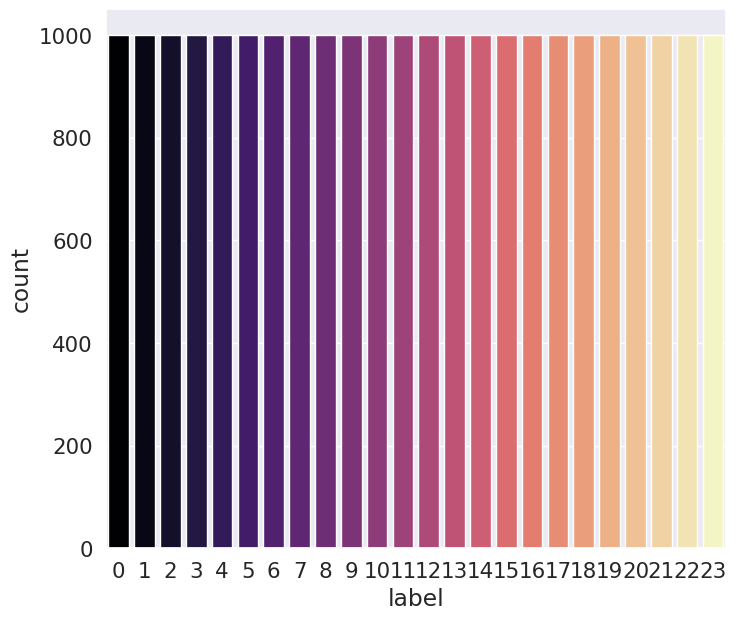

In [220]:
# countplot
plt.figure(figsize=(8,7))
sns.countplot(x='label',data=data,hue='label', palette='magma', legend=False)

### 1.4 Useful function for calculating the length of URLs
- After calculating the length of URLs, add a new column to the end of `data`

In [221]:
def url_length(url):
    return len(str(url))

data['url_length'] = data['Domain'].apply(lambda i: url_length(i))
data

,Domain,Family,label,url_length
0,google.com,benign,1,10
1,facebook.com,benign,1,12
2,youtube.com,benign,1,11
3,twitter.com,benign,1,11
4,instagram.com,benign,1,13
...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15
23996,nlgusntqeqixnqyo.org,locky,5,20
23997,awwduqqrjxttmn.su,locky,5,17
23998,ccxmwif.pl,locky,5,10


### 1.5 Create train/test data
- Create `X` (features matrix) &  `y` (labels)

In [222]:
# Split into X & y and train/test
X = data.drop("label", axis=1)
y = data["label"]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (19200, 3)
Y_train Shape : (19200,)
X_test  Shape : (4800, 3)
Y_test  Shape : (4800,)


### 1.6 Convert string into float
- Due to `Domain` & `Family` are all string types, hence they will be converted into float types.

In [223]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Domain", "Family", "url_length"]
# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

<24000x24069 sparse matrix of type '<class 'numpy.float64'>'
	with 72000 stored elements in Compressed Sparse Row format>

**Now the data are ready for the classifiers**

# 2 Random Forest Classifier

### 2.1 Create train/test data for Random Forest Classifier

In [224]:
np.random.seed(42)

# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


### 2.2 Create the model instance

In [225]:
# Create the model instance
clf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=-1) # n_estimators = 100 is the default

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 2.3 Fit the model to the training data

In [226]:
# Fit the model on the numerical data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [227]:
X_train

<19200x24069 sparse matrix of type '<class 'numpy.float64'>'
	with 57600 stored elements in Compressed Sparse Row format>

 ### 2.4 Make a prediction

In [228]:
y_preds = clf.predict(X_test)
y_preds

array([22, 21, 13, ..., 22, 16,  9])

In [229]:
y_test

3111     22
18679    21
17472    13
21451    20
20800    17
         ..
19950     8
18744    21
3263     22
2754     16
13061     9
Name: label, Length: 4800, dtype: int64

### 2.5 Score the model
- returns r^2 metric by default, also called coefficient of determination, higher is better
- Evaluate the model on the training data and test data

In [230]:
clf.score(X_train, y_train)

0.9936458333333333

In [231]:
clf.score(X_test, y_test)

0.9935416666666667

### 2.6 Classification Report

In [232]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       193
           3       1.00      1.00      1.00       208
           4       0.98      1.00      0.99       211
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       198
           9       1.00      0.94      0.97       199
          10       1.00      0.98      0.99       202
          11       1.00      0.93      0.96       204
          12       1.00      1.00      1.00       193
          13       1.00      1.00      1.00       199
          14       1.00      1.00      1.00       177
          15       1.00      1.00      1.00       186
          16       1.00      1.00      1.00       216
          17       1.00    

### 2.7 Confusion Report

In [233]:
# Make predictions on the test data
y_pred_test = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)

print("Accuracy:", accuracy)

Accuracy: 0.9935416666666667


In [234]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test,  y_pred_test)

array([[175,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 190,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 193,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 208,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 211,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 214,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 207,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

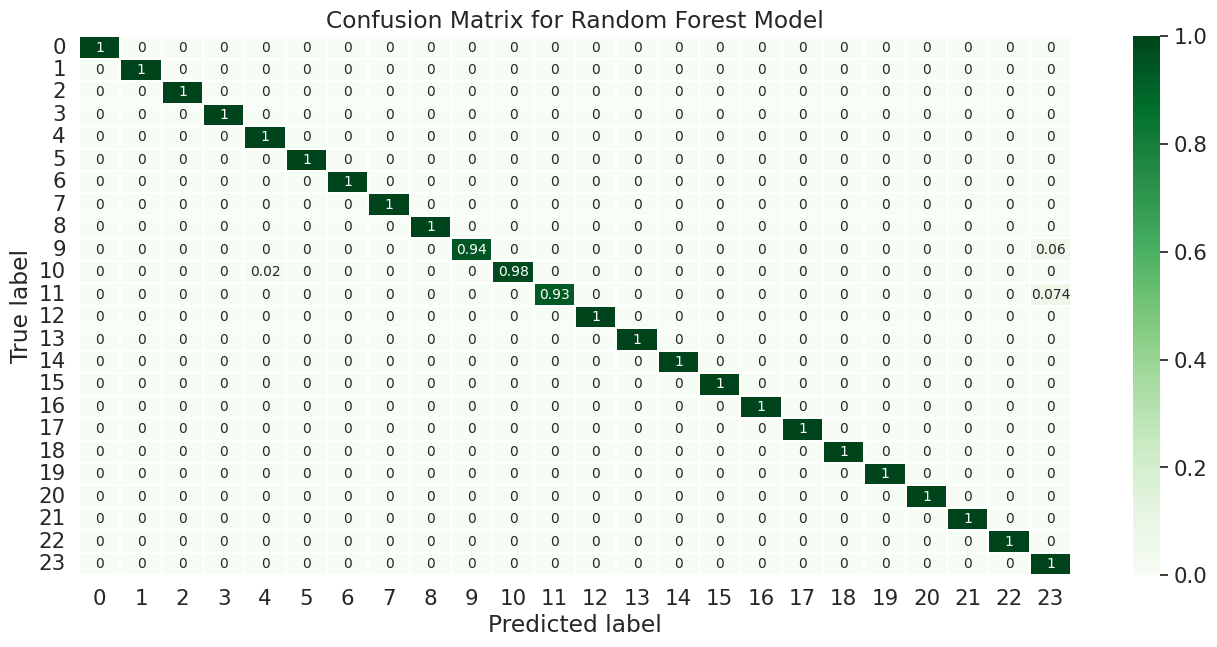

In [235]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 3 Logistic Regression

### 3.1 Create train/test data for Logistic Regression Classifier

In [236]:
df = data.copy()
df

,Domain,Family,label,url_length
0,google.com,benign,1,10
1,facebook.com,benign,1,12
2,youtube.com,benign,1,11
3,twitter.com,benign,1,11
4,instagram.com,benign,1,13
...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15
23996,nlgusntqeqixnqyo.org,locky,5,20
23997,awwduqqrjxttmn.su,locky,5,17
23998,ccxmwif.pl,locky,5,10


### 3.1.1 Check `Family` using bar chart

In [237]:
count = data['Family'].value_counts()
colors = [
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()

### 3.1.2 Useful Functions
- `extract_root_domain` can extract root domain name from `Domain`
- `extract_tld` can extract domain name from `Domain`

In [238]:
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain

In [239]:
def extract_tld(url):
    tld = url.split(".")[-1]
    return "." + tld

### 3.1.3 Create a new column `root_domain`
- There are 24,000 different root domain names, so I didn't plot this column

In [240]:
df['root_domain'] = df['Domain'].apply(lambda x: extract_root_domain(str(x)))

In [241]:
df

,Domain,Family,label,url_length,root_domain
0,google.com,benign,1,10,google
1,facebook.com,benign,1,12,facebook
2,youtube.com,benign,1,11,youtube
3,twitter.com,benign,1,11,twitter
4,instagram.com,benign,1,13,instagram
...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,fhyibfwhpahb
23996,nlgusntqeqixnqyo.org,locky,5,20,nlgusntqeqixnqyo
23997,awwduqqrjxttmn.su,locky,5,17,awwduqqrjxttmn
23998,ccxmwif.pl,locky,5,10,ccxmwif


In [242]:
df['root_domain'].value_counts()

root_domain
ddns                          1000
google                          30
bit                             24
                                21
blogspot                         8
                              ... 
1jn3ya01fdh3rq10tb0ttx0tub       1
2mfutb1vqsmvm7ofakc10f9g6j       1
2kwn5hmpc3mq1f01tbb16fmrh8       1
rz7yutzdcatl1018aq01h105ef       1
yhrryqjimvgfbqrv                 1
Name: count, Length: 21452, dtype: int64

### 3.1.4 Create a new column `domain_name`

In [243]:
df['domain_name'] = df['Domain'].apply(extract_tld)

In [244]:
df

,Domain,Family,label,url_length,root_domain,domain_name
0,google.com,benign,1,10,google,.com
1,facebook.com,benign,1,12,facebook,.com
2,youtube.com,benign,1,11,youtube,.com
3,twitter.com,benign,1,11,twitter,.com
4,instagram.com,benign,1,13,instagram,.com
...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,fhyibfwhpahb,.su
23996,nlgusntqeqixnqyo.org,locky,5,20,nlgusntqeqixnqyo,.org
23997,awwduqqrjxttmn.su,locky,5,17,awwduqqrjxttmn,.su
23998,ccxmwif.pl,locky,5,10,ccxmwif,.pl


In [245]:
df['domain_name'].value_counts()

domain_name
.com     6276
.net     4332
.eu      2035
.info    2000
.org     1732
         ... 
.gg         1
.ee         1
.site       1
.mp         1
.ph         1
Name: count, Length: 92, dtype: int64

### 3.1.5 Plot the `domain_name`

In [246]:
count = df['domain_name'].value_counts()
colors = [
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Domain       24000 non-null  object
 1   Family       24000 non-null  object
 2   label        24000 non-null  int64 
 3   url_length   24000 non-null  int64 
 4   root_domain  24000 non-null  object
 5   domain_name  24000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


### 3.1.6 Check whether there is any missing values
- There is no missing value.

In [248]:
df.isnull().sum()

Domain         0
Family         0
label          0
url_length     0
root_domain    0
domain_name    0
dtype: int64

In [249]:
df

,Domain,Family,label,url_length,root_domain,domain_name
0,google.com,benign,1,10,google,.com
1,facebook.com,benign,1,12,facebook,.com
2,youtube.com,benign,1,11,youtube,.com
3,twitter.com,benign,1,11,twitter,.com
4,instagram.com,benign,1,13,instagram,.com
...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,fhyibfwhpahb,.su
23996,nlgusntqeqixnqyo.org,locky,5,20,nlgusntqeqixnqyo,.org
23997,awwduqqrjxttmn.su,locky,5,17,awwduqqrjxttmn,.su
23998,ccxmwif.pl,locky,5,10,ccxmwif,.pl


# 3.2 Create the model instance

### 3.2.1 Create a cv object
- [`CountVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Convert a collection of text documents to a matrix of token counts.

In [250]:
# create cv object
cv = CountVectorizer()

In [251]:
cx = cv.fit_transform(df.root_domain) # transform all text which were tokenized and stemed
cx

<24000x22486 sparse matrix of type '<class 'numpy.int64'>'
	with 25016 stored elements in Compressed Sparse Row format>

In [252]:
cx.toarray() # Convert cv object into an array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 3.2.2 Split data into train and test

In [253]:
trainX, testX, trainY, testY = train_test_split(cx, df.label, test_size=0.33, random_state=42)

# 3.3 Fit the model to the training data

In [254]:
# create lr object
lr = LogisticRegression(solver='liblinear',penalty='l2',C=1.0, max_iter=1000, random_state=42)

In [255]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [256]:
lr.fit(trainX,trainY)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

### 3.4 Make a prediction

In [257]:
y_pred1 = lr.predict(testX)
y_pred1

array([22, 21, 14, ..., 14, 14, 14])

# 3.5 Score the model

In [258]:
lr.score(trainX,trainY)

0.9990671641791045

In [259]:
lr.fit(testX, testY)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [260]:
lr.score(testX, testY)

0.9984848484848485

In [261]:
accuracy1 = accuracy_score(testY, y_pred1)
print("test Accuracy:", accuracy1)

test Accuracy: 0.16843434343434344


# 3.6 Classification Report

In [262]:
# View the classification report for test data and predictions
print(classification_report(testY, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       1.00      0.13      0.23       305
           2       0.00      0.00      0.00       326
           3       0.00      0.00      0.00       337
           4       0.00      0.00      0.00       355
           5       0.00      0.00      0.00       339
           6       1.00      0.65      0.79       350
           7       0.00      0.00      0.00       339
           8       0.00      0.00      0.00       321
           9       1.00      0.03      0.05       338
          10       0.00      0.00      0.00       333
          11       0.00      0.00      0.00       321
          12       0.00      0.00      0.00       326
          13       0.00      0.00      0.00       335
          14       0.04      1.00      0.09       307
          15       0.00      0.00      0.00       316
          16       0.00      0.00      0.00       354
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 3.7 Confusion Matrix

In [263]:
cm1 = confusion_matrix(testY, y_pred1)
print(cm1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 313   0   0   0
    0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   0   0   0   0   0   0   0 265   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 326   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 337   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 355   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 339   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 228   0   0   0   0   0   0   0 122   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 339   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 321   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9   0   0   0   0 329   0   0   0
    0   0   0   0

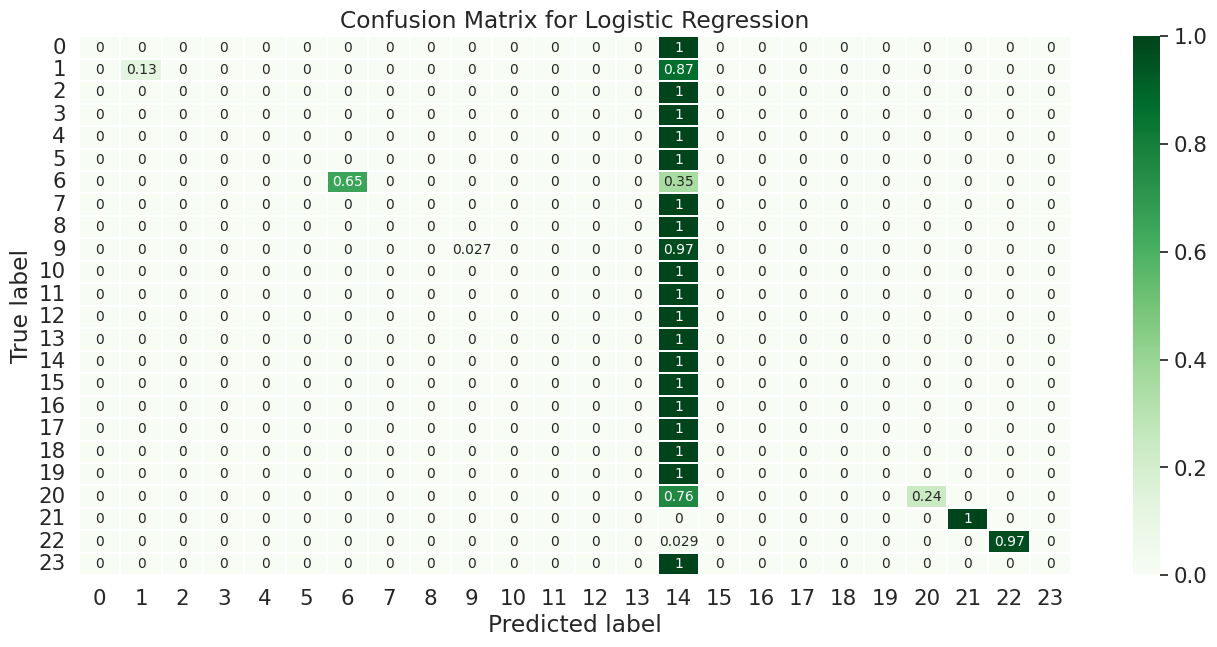

In [264]:
# Get and reshape confusion matrix data
matrix2 = confusion_matrix(testY, y_pred1)
matrix2 = matrix2.astype('float') / matrix2.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 4 Multi-Layer Perceptron Classifier

In [265]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate

In [266]:
data

,Domain,Family,label,url_length
0,google.com,benign,1,10
1,facebook.com,benign,1,12
2,youtube.com,benign,1,11
3,twitter.com,benign,1,11
4,instagram.com,benign,1,13
...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15
23996,nlgusntqeqixnqyo.org,locky,5,20
23997,awwduqqrjxttmn.su,locky,5,17
23998,ccxmwif.pl,locky,5,10


In [267]:
df

,Domain,Family,label,url_length,root_domain,domain_name
0,google.com,benign,1,10,google,.com
1,facebook.com,benign,1,12,facebook,.com
2,youtube.com,benign,1,11,youtube,.com
3,twitter.com,benign,1,11,twitter,.com
4,instagram.com,benign,1,13,instagram,.com
...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,5,15,fhyibfwhpahb,.su
23996,nlgusntqeqixnqyo.org,locky,5,20,nlgusntqeqixnqyo,.org
23997,awwduqqrjxttmn.su,locky,5,17,awwduqqrjxttmn,.su
23998,ccxmwif.pl,locky,5,10,ccxmwif,.pl


# 4.1 Create train/test data for Random Forest Classifier

In [268]:
count_vectorizer = CountVectorizer()
peh_vectors = count_vectorizer.fit_transform(df["Domain"])

# 4.2Create the model instance

In [269]:
Xtrain, Xtest, ytrain, ytest = train_test_split(peh_vectors, df["url_length"], shuffle = True, test_size=0.33, random_state=42)

# 4.3 Fit the model to the training data

In [207]:
mlp_peh = MLPClassifier(hidden_layer_sizes = (6,5), random_state = 3)

mlp_peh.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(6, 5), random_state=3)

# 4.4 Make a prediction

In [270]:
ypred = mlp_peh.predict(Xtest)
ypred

array([15, 22, 25, ..., 14, 14, 16])

# 4.5 Score the model

In [208]:
mlp_peh.score(Xtrain, ytrain)

0.998818407960199

In [209]:
mlp_peh.fit(Xtest, ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(6, 5), random_state=3)

In [210]:
mlp_peh.score(Xtest, ytest)

0.9977272727272727

4.5.1 Accuracy

In [212]:
accuracy_score(ytest, ypred)

0.9977272727272727

# 4.6 Classification Report

In [213]:
# View the classification report for test data and predictions
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         9
           6       0.94      1.00      0.97        15
           7       1.00      0.97      0.98        29
           8       1.00      1.00      1.00        28
           9       1.00      0.97      0.99        35
          10       1.00      1.00      1.00       424
          11       0.97      1.00      0.98        91
          12       1.00      1.00      1.00       499
          13       1.00      1.00      1.00       330
          14       1.00      1.00      1.00       756
          15       1.00      1.00      1.00       504
          16       1.00      1.00      1.00       761
          17       1.00      0.99      1.00       329
          18       1.00      1.00      1.00       560
          19       1.00      1.00      1.00       810
          20       1.00      1.00      1.00       854
          21       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 4.7 Confusion Matrix

In [214]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[ 0  0  1 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  0]]


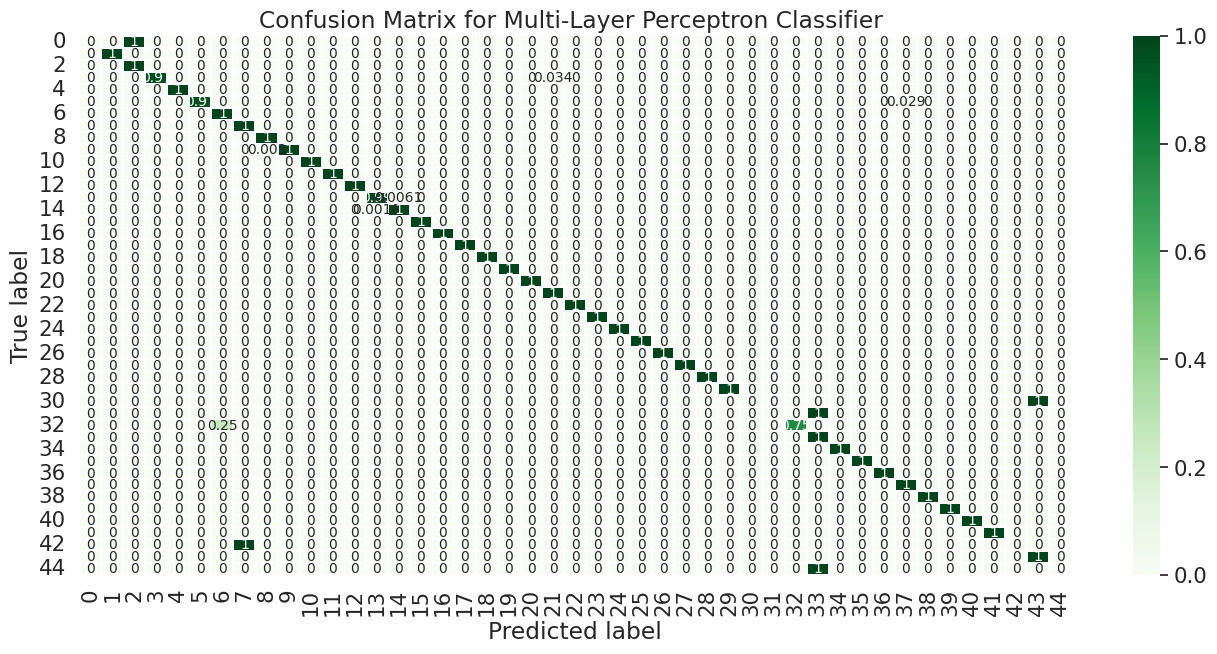

In [215]:
# Get and reshape confusion matrix data
matri = confusion_matrix(ytest, ypred)
matri = matri.astype('float') / matri.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matri, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multi-Layer Perceptron Classifier ')
plt.show()